# Noise Reduction Using CNN

## 1 - Introduction
Noise reduction can be implemented on both images and audio files. In this project I will implement it on both types. First we will start working with images as it will gives us an understanding of how Convolutional Neural Network (CNN) works. I will try my best to explain each and every step in deapth.

### 1.1 - Noise
Noise is any unwanted signal in any signal. In context of images it is  random variation of brightness or color information in images, and is usually an aspect of electronic noise (wikipedia: https://en.wikipedia.org/wiki/Image_noise). In audio, noise is unwanted or harmful sound considered unpleasant, loud, or disruptive to hearing (wikipedia: https://en.wikipedia.org/wiki/Noise).

### 1.2 - Clean image or audio
When noise is reduced or canceled out the outcome we get is clean image or audio.

### 1.3 - Steps of Training a Neural Network
Following are the steps of training a neural network:
1. Data preprocessing
2. Define Model
3. Forward Propagation
4. Calculate Loss
5. Backward Propagation
6. Update weights
7. Repeat


#### *Pre-requsite*
1. Neural Network


## 2 - Image Noise Reduction



We will be using supervised learning. The dataset we need to train the CNN will consist of
1. Noisy images
2. Clean images (Actual images)

We will feed the noisy images to CNN and it will predict a clean image (predicted image), then it will compare the clean images, predicted and actual image, and calculates the loss. Then it will update the weights accordingly. This process will repeat until we will get our desired results. This is the general overview of our training. We will discuss each and every step in detail when implementing.

We can use 2 types of dataset to train our model.
1. Dataset contains both noisy and clean images.
2. Dataset is a set of clean images and we add noise to is using python.

we will try it with 2nd approch

# Siting Dataset

In [ ]:
'''@InProceedings{MartinFTM01,
  author = {D. Martin and C. Fowlkes and D. Tal and J. Malik},
  title = {A Database of Human Segmented Natural Images and its
           Application to Evaluating Segmentation Algorithms and
           Measuring Ecological Statistics},
  booktitle = {Proc. 8th Int'l Conf. Computer Vision},
  year = {2001},
  month = {July},
  volume = {2},
  pages = {416--423}
}'''

"@InProceedings{MartinFTM01,\n  author = {D. Martin and C. Fowlkes and D. Tal and J. Malik},\n  title = {A Database of Human Segmented Natural Images and its\n           Application to Evaluating Segmentation Algorithms and\n           Measuring Ecological Statistics},\n  booktitle = {Proc. 8th Int'l Conf. Computer Vision},\n  year = {2001},\n  month = {July},\n  volume = {2},\n  pages = {416--423}\n}"

In [ ]:
! kaggle datasets download -d balraj98/berkeley-segmentation-dataset-500-bsds500

Dataset URL: https://www.kaggle.com/datasets/balraj98/berkeley-segmentation-dataset-500-bsds500
License(s): other
 88% 49.0M/56.0M [00:01<00:00, 37.4MB/s]
100% 56.0M/56.0M [00:01<00:00, 39.2MB/s]


Next step is to unzip this dataset. After unzipping we will get two folders
1. ground_truth
2. images

We will delete the ground_truth folder for now and will work with images folder. In images folder the data is already splitted into train, val and test data


In [ ]:
# import necessary libraries

import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [ ]:
# extract the zip file

zip_path = 'berkeley-segmentation-dataset-500-bsds500.zip'
extract_path = ''

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Now we can add noise to the images. we have almost two hundred images. These images will be our ground truth or our desired images. We will add noise to these images and these noisy images will be our input images.  

In [ ]:
# This is the function to add Noise to the images
def add_noise(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    mean = np.random.randint(0, 50)
    stddev = np.random.randint(0, 50)
    gauss_noise = np.zeros_like(img, dtype=np.uint8)
    for i in range(3):
        gauss_noise[:, :, i] = cv2.randn(np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8), mean, stddev)

    gauss_noise = gauss_noise.astype(np.float32)
    noisy_img = img.astype(np.float32) + gauss_noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    noisy_img = cv2.cvtColor(noisy_img, cv2.COLOR_RGB2BGR)
    return img, gauss_noise, noisy_img

In [ ]:
# This is the function to show the images

def show_image(img, gauss_noise, noisy_img):
    fig=plt.figure(dpi=300)

    fig.add_subplot(1,3,1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Original")

    fig.add_subplot(1,3,2)
    plt.imshow(cv2.cvtColor(gauss_noise, cv2.COLOR_BGR2GRAY), cmap="gray")
    plt.axis("off")
    plt.title("Gaussian Noise")

    fig.add_subplot(1,3,3)
    plt.imshow(noisy_img)
    plt.axis("off")
    plt.title("Combined")

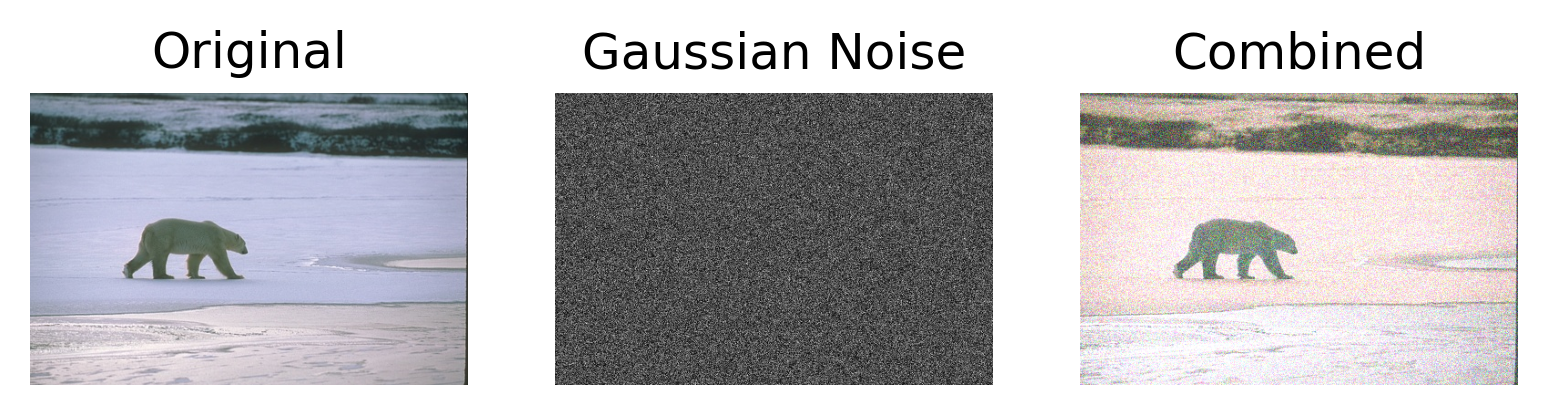

In [ ]:
img = cv2.imread('/content/images/test/100007.jpg')
img, gauss_noise, noisy_img =add_noise(img)
show_image(img, gauss_noise, noisy_img)

In [ ]:
! mkdir image

In [ ]:
! mkdir '/content/image/'train
! mkdir '/content/image/train/'clean
! mkdir '/content/image/train/'noisy

In [ ]:
! mkdir '/content/image/'val
! mkdir '/content/image/val/'clean
! mkdir '/content/image/val/'noisy

In [ ]:
! mkdir '/content/image/'test
! mkdir '/content/image/test/'clean
! mkdir '/content/image/test/'noisy

In [ ]:
def add_noise_to_jpg(folder_path, save_path):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is None:
                print(f"Failed to load image {img_path}")
                continue
            img, gauss_noise, noisy_img = add_noise(img)
            # show_image(img, gauss_noise, noisy_img)
            cv2.imwrite(os.path.join(save_path, filename), noisy_img)
    print("Noise added to all images")

In [ ]:
add_noise_to_jpg('/content/images/train','/content/image/train/noisy')
add_noise_to_jpg('/content/images/val','/content/image/val/noisy')
add_noise_to_jpg('/content/images/test','/content/image/test/noisy')

Noise added to all images
Noise added to all images
Noise added to all images


In [ ]:
def move_to_image_folder(folder_path, move_path):
  for filename in os.listdir(folder_path):
    if filename.endswith('.jpg'):
      img_path = os.path.join(folder_path, filename)
      img = cv2.imread(img_path)
      if img is None:
          print(f"Failed to load image {img_path}")
          continue
      cv2.imwrite(os.path.join(move_path, filename), img)


In [ ]:
move_to_image_folder('/content/images/train','/content/image/train/clean')
move_to_image_folder('/content/images/val','/content/image/val/clean')
move_to_image_folder('/content/images/test','/content/image/test/clean')

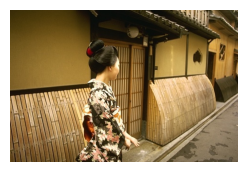

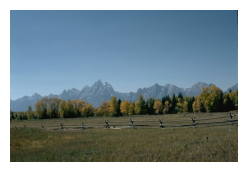

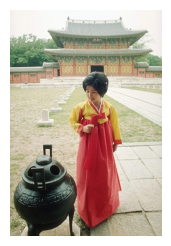

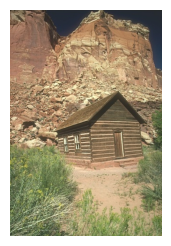

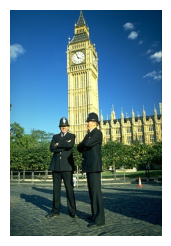

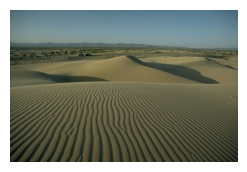

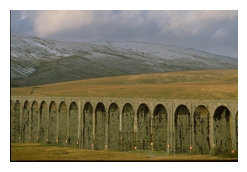

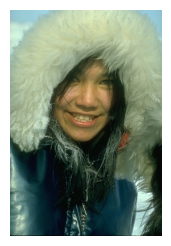

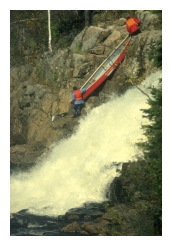

In [ ]:
i = 0
for filename in os.listdir('/content/image/train/clean'):
  img_path = os.path.join('/content/image/train/clean', filename)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  fig = plt.figure(figsize=(10, 10))
  #fig=plt.figure(dpi=300)
  fig.add_subplot(3,3, 1)
  plt.imshow(img)
  plt.axis("off")
  i+=1
  if i > 10:
    break

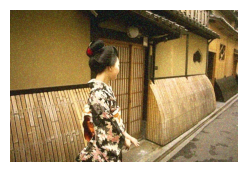

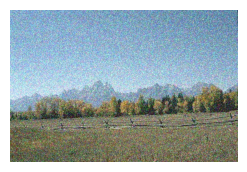

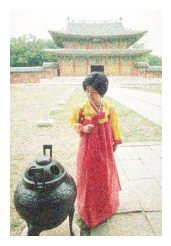

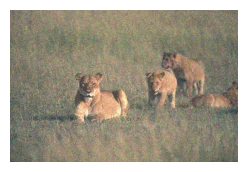

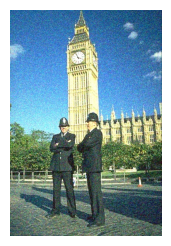

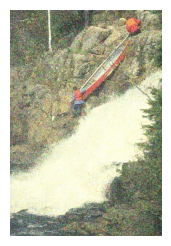

In [ ]:
i = 0
for filename in os.listdir('/content/image/train/noisy'):
  img_path = os.path.join('/content/image/train/noisy', filename)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  fig = plt.figure(figsize=(10, 10))
  #fig=plt.figure(dpi=300)
  fig.add_subplot(3,3, 1)
  plt.imshow(img)
  plt.axis("off")
  i+=1
  if i > 10:
    break

In [ ]:
!rm -r /content/ground_truth/
!rm -r /content/images/
!rm -r /content/berkeley-segmentation-dataset-500-bsds500.zip

In [159]:
train_dir = '/content/image/train'
val_dir = '/content/image/val'
test_dir = '/content/image/test'

In [160]:
def load_image_pairs(noisy_dir, clean_dir, batch_size, img_size):
    # Load the noisy images
    noisy_ds = image_dataset_from_directory(
        noisy_dir,
        batch_size=batch_size,
        image_size=img_size,
        label_mode=None,
        shuffle=False,  # Ensure order is maintained
    )

    # Load the clean images
    clean_ds = image_dataset_from_directory(
        clean_dir,
        batch_size=batch_size,
        image_size=img_size,
        label_mode=None,
        shuffle=False,  # Ensure order is maintained
    )

    # Combine the noisy and clean datasets
    dataset = tf.data.Dataset.zip((noisy_ds, clean_ds))

    return dataset

In [161]:
from tensorflow.keras.utils import image_dataset_from_directory

IMG_SIZE = (256, 256)
BATCH_SIZE = 64

# Read a TensorFlow dataset from each the training, validation, and test directory

### START YOUR CODE HERE ### (3 LOC)
train_ds = load_image_pairs(
    '/content/image/train/noisy',
    '/content/image/train/clean',
    BATCH_SIZE,
    IMG_SIZE,
)
val_ds = load_image_pairs(
    '/content/image/val/noisy',
    '/content/image/val/clean',
    BATCH_SIZE,
    IMG_SIZE,
)
test_ds = load_image_pairs(
    '/content/image/test/noisy',
    '/content/image/test/clean',
    BATCH_SIZE,
    IMG_SIZE,
)
### END YOUR CODE HERE ###

Found 200 files belonging to 1 classes.
Found 200 files belonging to 1 classes.
Found 100 files belonging to 1 classes.
Found 100 files belonging to 1 classes.
Found 200 files belonging to 1 classes.
Found 200 files belonging to 1 classes.


In [162]:
for noisy, clean in train_ds.take(1):
  print(clean.shape)
  print(noisy.shape)

(64, 256, 256, 3)
(64, 256, 256, 3)


In [163]:
batch = train_ds.take(1)

for image_batch, label_batch in batch:
  print(f'x shape: {image_batch.shape}')
  print(f'y shape: {label_batch.shape}\n')

  print(f'x example: {image_batch[0]}')
  print(f'y example: {label_batch[0]}\n')

x shape: (64, 256, 256, 3)
y shape: (64, 256, 256, 3)

x example: [[[106.590195 121.73251  102.80368 ]
  [113.682396 126.85547  106.942   ]
  [129.09363  141.19553  121.195526]
  ...
  [ 30.474174  47.16788   32.67856 ]
  [ 21.64573   30.793411  21.242031]
  [ 30.702873  31.092396  27.774036]]

 [[102.13854  119.14261  101.13013 ]
  [109.952896 125.077896 106.140396]
  [128.61667  141.49454  122.25625 ]
  ...
  [ 43.925777  60.32799   43.205074]
  [ 21.453594  30.045391  20.529453]
  [ 31.024063  33.472527  29.559818]]

 [[110.87847  130.94327  114.53863 ]
  [122.09088  139.29102  122.0401  ]
  [127.21224  140.72179  123.35655 ]
  ...
  [ 62.38909   77.93814   58.55706 ]
  [ 22.708202  31.3       21.389843]
  [ 30.339409  35.695225  31.374218]]

 ...

 [[ 36.877647  68.23346   52.86823 ]
  [ 45.042843  73.38555   58.973442]
  [ 57.124126  83.12413   70.12413 ]
  ...
  [ 72.80425   79.198784  69.00152 ]
  [ 45.964973  47.601692  39.283333]
  [ 36.        37.55113   29.195312]]

 [[ 43.6

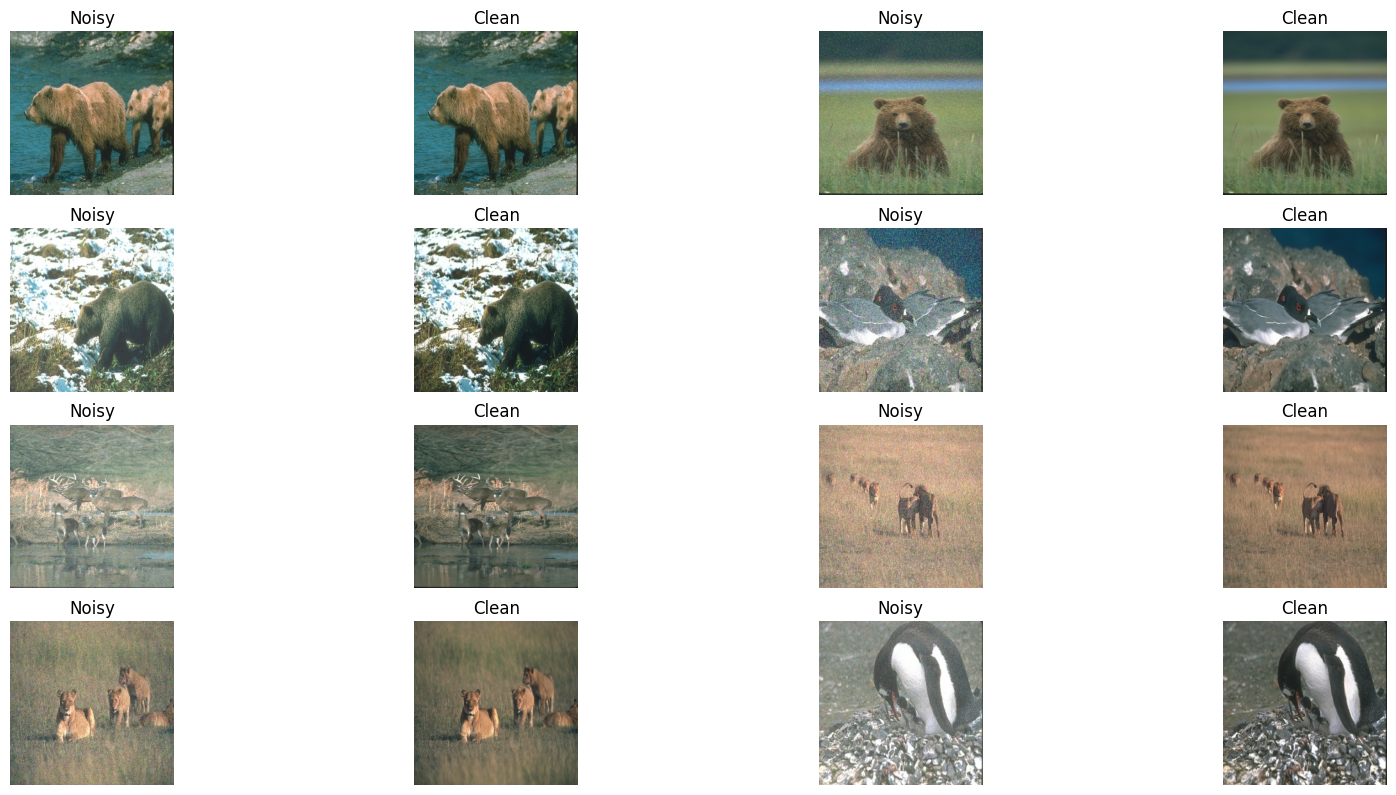

In [164]:
plt.figure(figsize=(20, 20))
for noisy, clean in batch:
  for i in range(8):
    ax = plt.subplot(8, 4, 2*i + 1)
    plt.imshow(noisy[i].numpy().astype("uint8"))
    plt.title("Noisy")
    plt.axis("off")

    ax = plt.subplot(8, 4, 2*i + 2)
    plt.imshow(clean[i].numpy().astype("uint8"))
    plt.title("Clean")
    plt.axis("off")




In [165]:
batch = train_ds.take(1)
for noisy, clean in batch:
  print(np.min(noisy[0]), np.max(noisy[0]))

6.624058 255.0


In [166]:
from tensorflow.keras import layers

normalization_layer = layers.Rescaling(1./255)

In [167]:
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), normalization_layer(y)))

In [168]:
batch = train_ds.take(1)
for noisy, clean in batch:
  print(np.min(noisy[0]), np.max(noisy[0]))

0.025976699 1.0


In [169]:
val_ds = val_ds.map(lambda x, y: (normalization_layer(x),  normalization_layer(y)))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x),  normalization_layer(y)))

In [170]:
batch = val_ds.take(1)
for noisy, clean in batch:
  print(np.min(noisy[0]), np.max(noisy[0]))

0.008271835 1.0


In [171]:
import tensorflow as tf

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [172]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet(input_shape=(256, 256, 3)):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    c5 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])

    return model

# Create the U-Net model for noise reduction
unet_model = unet(input_shape=(256, 256, 3))
unet_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
unet_model.summary()


Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_271 (Conv2D)         (None, 256, 256, 32)         896       ['input_14[0][0]']            
                                                                                                  
 conv2d_272 (Conv2D)         (None, 256, 256, 32)         9248      ['conv2d_271[0][0]']          
                                                                                                  
 max_pooling2d_52 (MaxPooli  (None, 128, 128, 32)         0         ['conv2d_272[0][0]']          
 ng2D)                                                                                     

In [173]:
history = unet_model.fit(train_ds,
    epochs=50,
    validation_data=val_ds)

Epoch 1/50
4/4 [==============================] - 13s 2s/step - loss: 0.0642 - mse: 0.0642 - val_loss: 0.0648 - val_mse: 0.0648
Epoch 2/50
4/4 [==============================] - 4s 911ms/step - loss: 0.0609 - mse: 0.0609 - val_loss: 0.0591 - val_mse: 0.0591
Epoch 3/50
4/4 [==============================] - 4s 909ms/step - loss: 0.0516 - mse: 0.0516 - val_loss: 0.0514 - val_mse: 0.0514
Epoch 4/50
4/4 [==============================] - 4s 910ms/step - loss: 0.0449 - mse: 0.0449 - val_loss: 0.0352 - val_mse: 0.0352
Epoch 5/50
4/4 [==============================] - 4s 952ms/step - loss: 0.0327 - mse: 0.0327 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 6/50
4/4 [==============================] - 4s 959ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 7/50
4/4 [==============================] - 4s 1s/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 8/50
4/4 [==============================] - 4s 903ms/step - loss: 0.0132 - mse: 0.0132 - 

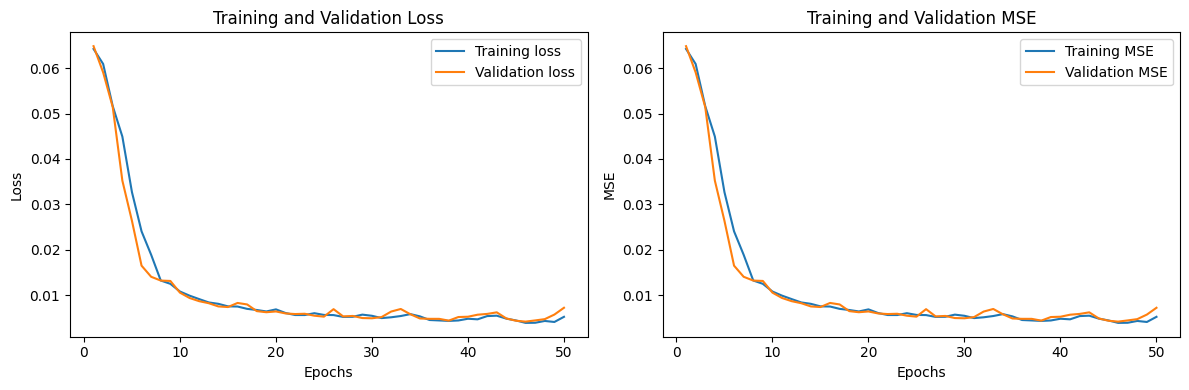

In [174]:
def plot_training_history(history):
    # Get training and validation loss
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get training and validation metrics
    mse = history.history['mse']
    val_mse = history.history['val_mse']

    epochs = range(1, len(loss) + 1)

    # Plot training and validation loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation MSE
    plt.subplot(1, 2, 2)
    plt.plot(epochs, mse, label='Training MSE')
    plt.plot(epochs, val_mse, label='Validation MSE')
    plt.title('Training and Validation MSE')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [175]:
# Load a batch of test data
for noisy_images, clean_images in test_ds.take(1):
    # Make predictions
    denoised_images = unet_model.predict(noisy_images)


2/2 [==============================] - 0s 187ms/step


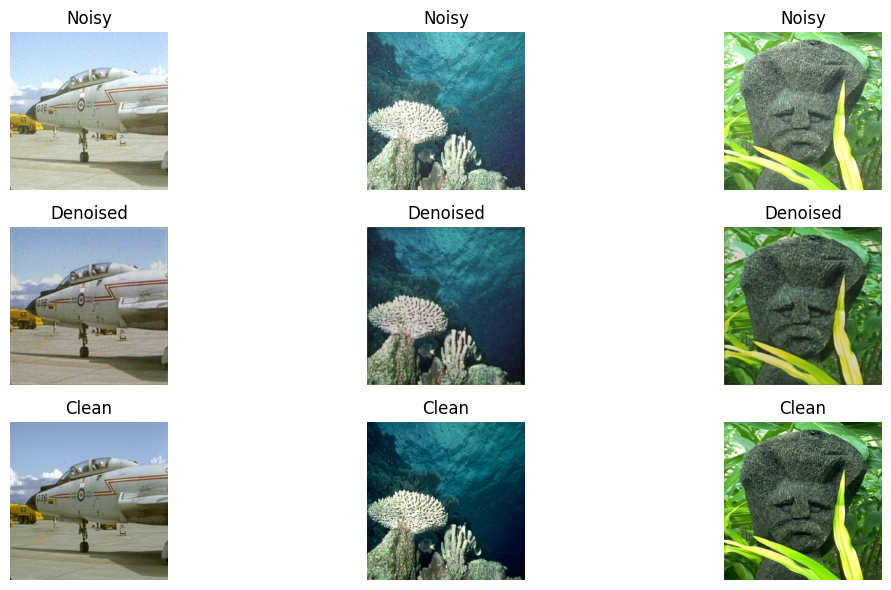

In [178]:

def rescale_image(image):
    image = image * 255.0
    return image.astype("uint8")

# Visualize the results
plt.figure(figsize=(18, 6))
for i in range(3,6):  # Display the first 5 images
    # Noisy image
    ax = plt.subplot(3, 5, (i-3) + 1)
    plt.imshow(rescale_image(noisy_images[i].numpy()))
    plt.title("Noisy")
    plt.axis("off")

    # Denoised image
    ax = plt.subplot(3, 5, (i-3) + 6)
    plt.imshow(rescale_image(denoised_images[i]))
    plt.title("Denoised")
    plt.axis("off")

    # Clean image
    ax = plt.subplot(3, 5, (i-3) + 11)
    plt.imshow(rescale_image(clean_images[i].numpy()))
    plt.title("Clean")
    plt.axis("off")

plt.tight_layout()
plt.show()
